# ECG Heartbeat Categorization Dataset 

## Abstract
This dataset is composed of two collections of heartbeat signals derived from two famous datasets in heartbeat classification: the MIT-BIH Arrhythmia Dataset and The PTB Diagnostic ECG Database. The number of samples in both collections is large enough for training a deep neural network. This dataset has been used in exploring heartbeat classification using deep neural network architectures and observing some of the capabilities of transfer learning on it. The signals correspond to electrocardiogram (ECG) shapes of heartbeats for the normal case and the cases affected by different arrhythmias and myocardial infarction. These signals are preprocessed and segmented, with each segment corresponding to a heartbeat.

## Arrhythmia Dataset
- Number of Samples: 109446
- Number of Categories: 5
- Sampling Frequency: 125Hz
- Data Source: Physionet's MIT-BIH Arrhythmia Dataset
- Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

## The PTB Diagnostic ECG Database
- Number of Samples: 14552
- Number of Categories: 2
- Sampling Frequency: 125Hz
- Data Source: Physionet's PTB Diagnostic Database
agnostic Database

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
import tensorflow as tf
import tensorflow
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import pandas as pd
import numpy as np
np.random.seed(5)
tf.random.set_seed(5)

# With The PTB Diagnostic ECG Database

## With Normal Patient Data

In [4]:
df = pd.read_csv("dataset/ptbdb_normal.csv", header=None) # Download the dataset from -> https://www.kaggle.com/datasets/shayanfazeli/heartbeat. Extract into dataset folder

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,...,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.0,4046.0
mean,0.979670,0.711486,0.311677,0.119575,0.088608,0.130843,0.159653,0.165608,0.168005,0.170783,...,0.001540,0.001332,0.001304,0.001220,0.000991,0.000894,0.000454,0.000474,0.0,0.0
std,0.029061,0.186376,0.183457,0.110457,0.075760,0.081104,0.090131,0.096094,0.102506,0.106190,...,0.018664,0.016234,0.016668,0.016658,0.015204,0.015311,0.010834,0.011202,0.0,0.0
min,0.782178,0.121784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.964468,0.580160,0.164112,0.028731,0.027735,0.070776,0.094656,0.098848,0.095594,0.094988,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,1.000000,0.726449,0.303266,0.092655,0.079476,0.121144,0.134312,0.142771,0.143002,0.145068,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,1.000000,0.863699,0.436091,0.187527,0.134861,0.183746,0.216203,0.217895,0.220572,0.223053,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,1.000000,1.000000,0.985955,0.910798,0.846591,0.770205,0.754524,0.749095,0.729192,0.700844,...,0.415879,0.361283,0.383522,0.407025,0.446281,0.483471,0.371502,0.376668,0.0,0.0


In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4044,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


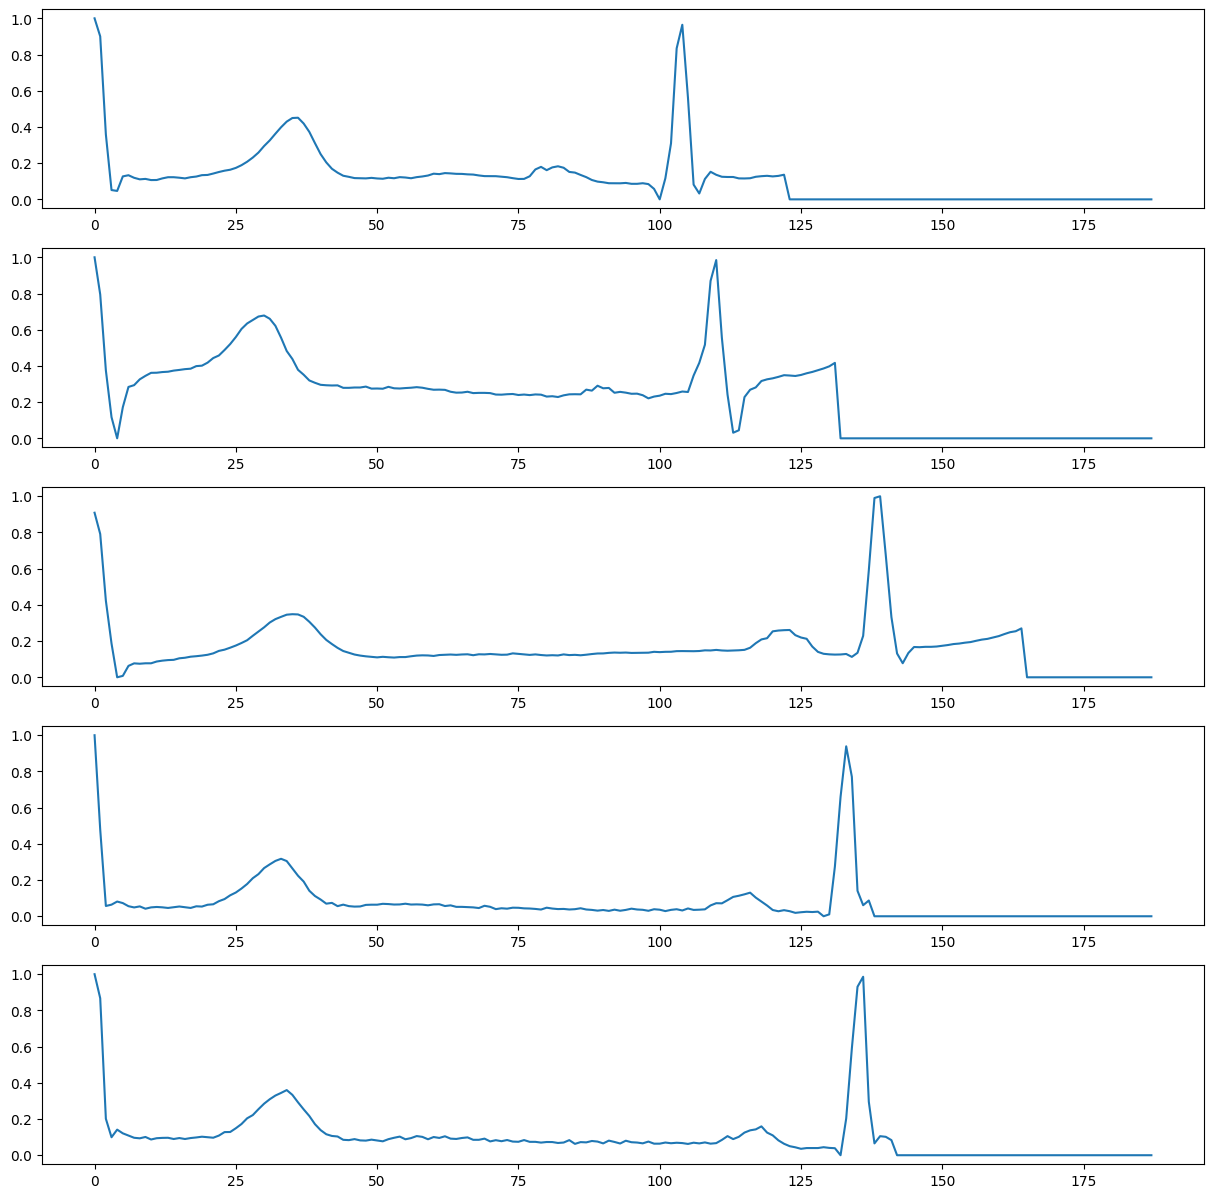

In [7]:
plt.figure(figsize=(15, 15))
plt.subplot(5, 1, 1)
plt.plot(df.loc[[0]].values[0])
plt.subplot(5, 1, 2)
plt.plot(df.loc[[1]].values[0])
plt.subplot(5, 1, 3)
plt.plot(df.loc[[2]].values[0])
plt.subplot(5, 1, 4)
plt.plot(df.loc[[3]].values[0])
plt.subplot(5, 1, 5)
plt.plot(df.loc[[4]].values[0])
plt.show()

## With Abnormal Patient Data

In [24]:
df1 = pd.read_csv("dataset/ptbdb_abnormal.csv", header=None)

In [25]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,...,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.0,10506.0
mean,0.975468,0.725582,0.438306,0.290384,0.252897,0.249423,0.245668,0.247160,0.250203,0.252396,...,0.001055,0.001057,0.000744,0.000554,0.000533,0.000313,0.000070,0.000074,0.0,1.0
std,0.036354,0.199030,0.262699,0.270977,0.237004,0.211751,0.200159,0.194840,0.193160,0.192341,...,0.022312,0.022585,0.017557,0.013781,0.013553,0.010901,0.003754,0.004044,0.0,0.0
min,0.624227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,0.957325,0.586602,0.236455,0.074064,0.088487,0.101422,0.097175,0.096331,0.098527,0.098041,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
50%,1.000000,0.745646,0.404297,0.212845,0.173046,0.180927,0.182782,0.191793,0.197088,0.200919,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
75%,1.000000,0.890043,0.620889,0.427811,0.343089,0.327582,0.328089,0.347707,0.359378,0.370106,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.985523,0.993213,0.997738,...,0.791899,0.773743,0.789804,0.628177,0.602033,0.644880,0.265025,0.279310,0.0,1.0


In [26]:
df1

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10504,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


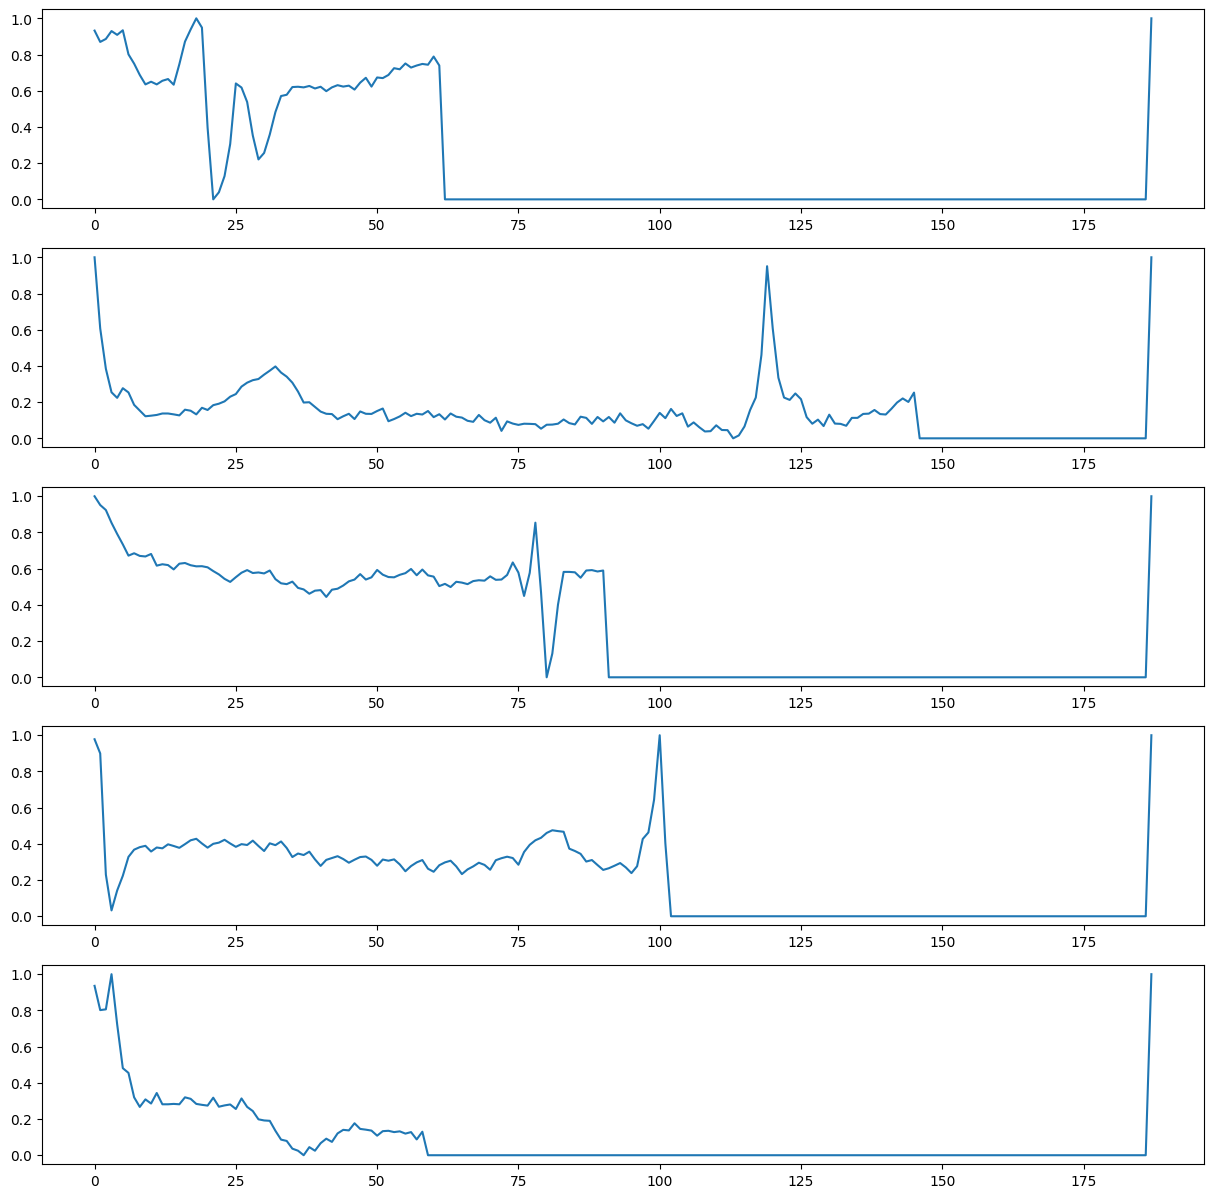

In [27]:
plt.figure(figsize=(15, 15))
plt.subplot(5, 1, 1)
plt.plot(df1.loc[[0]].values[0])
plt.subplot(5, 1, 2)
plt.plot(df1.loc[[1]].values[0])
plt.subplot(5, 1, 3)
plt.plot(df1.loc[[2]].values[0])
plt.subplot(5, 1, 4)
plt.plot(df1.loc[[3]].values[0])
plt.subplot(5, 1, 5)
plt.plot(df1.loc[[4]].values[0])
plt.show()

# Building the Model

In [45]:
X = df.values
y = np.zeros((len(X), 2))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=5)

In [46]:
aX = df1.values
ay = np.zeros((len(aX), 2))

aX_train, aX_test, ay_train, ay_test = train_test_split(aX, ay, test_size=0.05, random_state=5)

In [47]:
X_test

array([[1.        , 0.81038302, 0.2396328 , ..., 0.        , 0.        ,
        0.        ],
       [0.97846997, 0.66468161, 0.09436555, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.68691796, 0.41396895, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.94392061, 0.62630272, 0.23325062, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.80500323, 0.49326491, ..., 0.        , 0.        ,
        0.        ],
       [0.91797149, 0.83921474, 0.36644074, ..., 0.        , 0.        ,
        0.        ]])

# Test set is a mix of both classes

In [48]:
X_test, y_test = np.concatenate((X_test, aX_test), axis = 0), np.concatenate((y_test, ay_test), axis = 0)

# Finetuning with normal heart category Data

In [49]:
model = Sequential()

model.add(Dense(256, input_dim=188, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, shuffle=True)

Epoch 1/20
121/121 [==============================] - 1s 1ms/step - loss: 0.0489 - accuracy: 0.7377
Epoch 2/20
121/121 [==============================] - 0s 1ms/step - loss: 3.3056e-04 - accuracy: 0.9964
Epoch 3/20
121/121 [==============================] - 0s 1ms/step - loss: 5.9823e-05 - accuracy: 1.0000
Epoch 4/20
121/121 [==============================] - 0s 1ms/step - loss: 2.2666e-05 - accuracy: 1.0000
Epoch 5/20
121/121 [==============================] - 0s 1ms/step - loss: 1.2064e-05 - accuracy: 1.0000
Epoch 6/20
121/121 [==============================] - 0s 1ms/step - loss: 7.6038e-06 - accuracy: 1.0000
Epoch 7/20
121/121 [==============================] - 0s 2ms/step - loss: 5.2370e-06 - accuracy: 1.0000
Epoch 8/20
121/121 [==============================] - 0s 2ms/step - loss: 3.8436e-06 - accuracy: 1.0000
Epoch 9/20
121/121 [==============================] - 0s 2ms/step - loss: 2.9389e-06 - accuracy: 1.0000
Epoch 10/20
121/121 [==============================] - 0s 2ms/step -

In [50]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 0s 2ms/step - loss: 4.2200e-07 - accuracy: 0.9561


[4.219965603624587e-07, 0.9561042785644531]

In [51]:
model.save("PTBDB_NN_V1.keras")

# Finetuning with abnormal heart category Data

In [52]:
history = model.fit(aX_train, ay_train, epochs=20, shuffle=True)

Epoch 1/20
312/312 [==============================] - 0s 2ms/step - loss: 1.5016e-07 - accuracy: 0.9505
Epoch 2/20
312/312 [==============================] - 0s 1ms/step - loss: 5.0353e-08 - accuracy: 0.9088
Epoch 3/20
312/312 [==============================] - 0s 1ms/step - loss: 2.9261e-08 - accuracy: 0.8898
Epoch 4/20
312/312 [==============================] - 0s 1ms/step - loss: 1.9897e-08 - accuracy: 0.8807
Epoch 5/20
312/312 [==============================] - 0s 2ms/step - loss: 1.4665e-08 - accuracy: 0.8754
Epoch 6/20
312/312 [==============================] - 0s 1ms/step - loss: 1.1346e-08 - accuracy: 0.8747
Epoch 7/20
312/312 [==============================] - 0s 1ms/step - loss: 9.0733e-09 - accuracy: 0.8746
Epoch 8/20
312/312 [==============================] - 0s 1ms/step - loss: 7.4343e-09 - accuracy: 0.8768
Epoch 9/20
312/312 [==============================] - 0s 2ms/step - loss: 6.2063e-09 - accuracy: 0.8793
Epoch 10/20
312/312 [==============================] - 0s 2ms/st

In [53]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 0s 1ms/step - loss: 2.1521e-08 - accuracy: 0.8985


[2.1521451287753735e-08, 0.8984910845756531]